# Traffic Signs Dataset (Argentina)
In this notebook, I'm going to be organizing my traffic signs dataset, creating pickle files, etc.

In [1]:
import os
import cv2
import csv
import glob
import pickle
import random
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
# Dataset path
dataset_path = '/home/arian/Documents/proyecto-integrador/data/crops/'

# Pickle folder 
data_folder = './data/custom/'
train_pickle_file = 'train.p' 
valid_pickle_file = 'valid.p'

# Classes file
classes_file = 'classes.csv'

# Image size
IMG_SIZE = 64

In [3]:
# Load classes
with open(os.path.join(data_folder, classes_file), mode='r') as csv_file:
    reader = csv.reader(csv_file)
    classes = {rows[0]:rows[1] for rows in reader}

In [4]:
from ipy_table import *

# Auxiliary ists
temp = []
classes_list = []

# Convert the dictionary to a list
for key, value in sorted(classes.items()):
    temp = [key,value]
    classes_list.append(temp)

# Create table with make_table
make_table(classes_list)

# Apply some styles to the table after it is created
set_column_style(0, width='100', bold=True, color='hsla(225, 80%, 94%, 1)')
set_column_style(1, width='100')

# Render the table
render()

0,Cruce
1,Empalme Izquierda
2,Empalme Derecha
3,Contramano
4,Curva Izquierda
5,Curva Derecha
6,Velocidad Máxima 40 km/h
7,Velocidad Máxima 60 km/h
8,Velocidad Máxima 80 km/h


In [5]:
TEST_PERCENTAGE = 0.75

classes_folder = glob.glob(os.path.join(dataset_path, '*'))

train_data = {'features': [], 'labels': []}
valid_data = {'features': [], 'labels': []}

for class_folder in classes_folder:
    file_filter = '*.jpg'
    file_list = glob.glob(os.path.join(class_folder, file_filter))
    
    class_id = int(os.path.basename(class_folder).split('-')[0])
    
    image_count = len(file_list)
    test_limit = int(TEST_PERCENTAGE*image_count)
    
    # Add to train_data
    for image_path in file_list[:test_limit]:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img[...,::-1]
        
        train_data['features'].append(img)
        train_data['labels'].append(class_id)
        
    # Add to valid_data
    for image_path in file_list[test_limit:]:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img[...,::-1]
        
        valid_data['features'].append(img)
        valid_data['labels'].append(class_id)

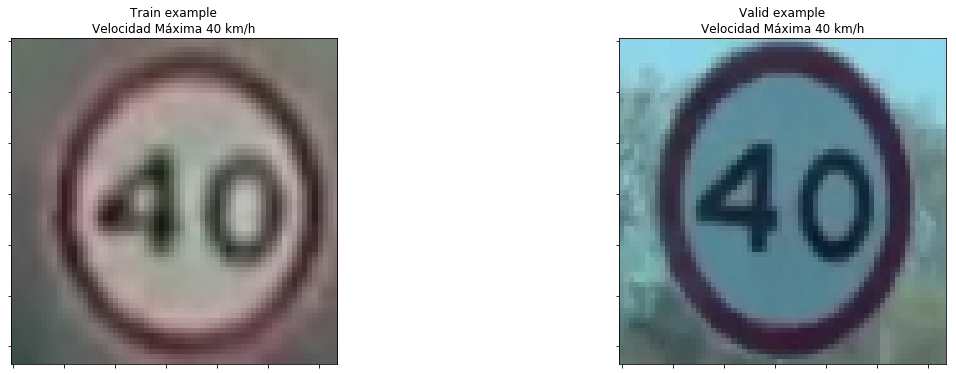

In [6]:
# Verify data
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

index = random.randrange(0, len(train_data['features']))
ax1.imshow(train_data['features'][index])
ax1.set_title('Train example\n' + classes[str(train_data['labels'][index])])
ax1.set_yticklabels([])
ax1.set_xticklabels([])

index = random.randrange(0, len(valid_data['features']))
ax2.imshow(valid_data['features'][index])
ax2.set_title('Valid example\n' + classes[str(valid_data['labels'][index])])
ax2.set_yticklabels([])
ax2.set_xticklabels([])


plt.show()

In [7]:
# Transform list into numpy arrays
train_data['features'] = np.array(train_data['features'])
train_data['labels'] = np.array(train_data['labels'])

valid_data['features'] = np.array(valid_data['features'])
valid_data['labels'] = np.array(valid_data['labels'])

# Save dictionaries to pickle files
pickle_file_path = os.path.join(data_folder, train_pickle_file)
pickle_file = open(pickle_file_path, 'wb')
pickle.dump(train_data, pickle_file)

pickle_file_path = os.path.join(data_folder, valid_pickle_file)
pickle_file = open(pickle_file_path, 'wb')
pickle.dump(valid_data, pickle_file)